#### Greg Walsh
#### Pima Indians - diabetes prediction
#### Neural Network for binary classification

In [32]:
# Import necessary libraries
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.constraints import maxnorm
from keras.models import model_from_json
from keras import optimizers
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

# set random seed for reproducibility
np.random.seed(7)

# load pima indians dataset
dataset = np.loadtxt("pima-indians-diabetes.csv", delimiter=",")

# split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8] 

# create model (requires completion)
model = Sequential()
# Input layer (with dropout)
model.add(Dropout(0.5,input_shape=(8,)))
# First hidden layer 10 neurons with a relu activation. 
# normal distribution will be used to initialise weights, 
# which is why "kernel_initializer='normal'
# "kernel_constraint=maxnorm(3)" weights are restricted to >=3
model.add(Dense(10,  kernel_initializer='normal', activation='relu',kernel_constraint=maxnorm(3)))
# Second hidden layer 8 neurons this time 
model.add(Dense(8,  kernel_initializer='normal', activation='relu',kernel_constraint=maxnorm(3)))
# Output (target) layer 1 neuron this time. This is our output so we want to use sigmoid. 
model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))

# after all layers a created we compile the model with a loss function optomizer and look at
# speicific metrics to know how the training it going
# we use:  
# loss: "binary_crossentropy" the predicted observations 
# from the sigmoid activation function will be used to compute 
# loss = -{(y\log(p) + (1 - y)\log(1 - p))}, where log is the natural log, 
# y is binary indicator (0 or 1) and p is predicted probability.
# optimizer='adam'
# metrics=['accuracy']
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# we then need to fit our model the loss should be going down 
# and here is where a validation split is used
# 67% and a 33 % split  
# Note verbose=0 is important so that a bunch of stuff doesnt output
history=model.fit(X,Y,validation_split=0.333,epochs=1000,verbose=0)

# evaluate() is for evaluating the already trained model using 
# the validation data.
scores = model.evaluate(X, Y)
# predict() generates output predictions for the input samples.
Y_predict = model.predict(X)

print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))


# Main reason for this is to be able to use our model again in the future without
# Having to use the resources to retrain and test the model
# saves so a json file which can be reread at a later date
model_json = model.to_json()
with open('model.json', 'w') as json_file:
    json_file.write(model_json)
# Save weights and biases to HD5 file
# the model exists in an h5 file that keras can look at again to properly
# assign weights and bias with our model again
model.save_weights('model.h5')

print('===================')
print('Saved model to disk')
print('===================')

# Confusion Matrix will look at the quality of our outputs from the NN. 0,0 and 1,1 are what we strive for.
rounded = [round(i[0]) for i in Y_predict]
y_pred = np.array(rounded,dtype='int64')
print('Confusion Matrix')
print('================')
CM = confusion_matrix(Y, y_pred)
print('True negatives: ',CM[0,0]) # No and predicted No | we like this
print('False negatives: ',CM[1,0]) # Yes but predicted No | This is horrible. We want least amount of these.
print('False positives: ',CM[0,1]) # No but predicted Yes | This is okay for this use case.
print('True positives: ',CM[1,1]) # Yes and predicted Yes | we like this

768/768 [==============================] - 0s 22us/step

acc: 66.02%
Saved model to disk
Confusion Matrix
True negatives:  499
False negatives:  260
False positives:  1
True positives:  8


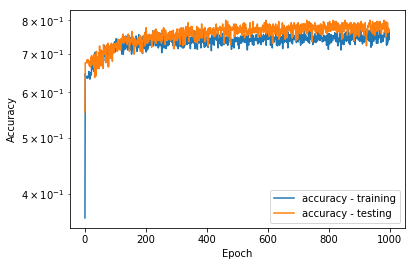

In [30]:
# Plot our data
import matplotlib.pyplot as plt
accuracy_training = history.history['accuracy']
loss = history.history['loss']
accuracy_testing = history.history['val_accuracy']
#plt.semilogy(loss,label='loss')
plt.semilogy(accuracy_training,label='accuracy - training')
plt.semilogy(accuracy_testing,label='accuracy - testing')
plt.xlabel('Epoch' )
plt.ylabel('Accuracy')
plt.legend()
#plt.grid()
plt.show()